Importing libraries

In [ ]:
pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 34kB/s 


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Splitting into X train Y train

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
#Reshaping the dataset
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [ ]:
#converting class vectors to binary class matrices
#here we have 10 classes
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [ ]:
#normalization
x_train=x_train/255.
x_test=x_test/255.

Model Creation

In [ ]:
batch_size=128
num_classes=10
epochs=15

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [ ]:
#compiling the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
#fitting the model
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 16s 265us/step - loss: 0.2354 - accuracy: 0.9269 - val_loss: 0.0523 - val_accuracy: 0.9827
Epoch 2/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.0721 - accuracy: 0.9783 - val_loss: 0.0339 - val_accuracy: 0.9882
Epoch 3/15
60000/60000 [==============================] - 10s 164us/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 0.0297 - val_accuracy: 0.9894
Epoch 4/15
60000/60000 [==============================] - 10s 165us/step - loss: 0.0399 - accuracy: 0.9880 - val_loss: 0.0301 - val_accuracy: 0.9891
Epoch 5/15
60000/60000 [==============================] - 11s 175us/step - loss: 0.0341 - accuracy: 0.9890 - val_loss: 0.0292 - val_accuracy: 0.9896
Epoch 6/15
60000/60000 [==============================] - 10s 174us/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 0.0264 - val_accuracy: 0.9911
Epoch 7/15
60000/60000 [==============================] 

In [ ]:
#evaluating the model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 159us/step


[0.02642264038235544, 0.9922000169754028]

In [ ]:
#saving the model
model.save('hand.h5')

PREDICTION USING THE SAVED MODEL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image
 
def test_on_img(imgpath):
    img=PIL.Image.open(imgpath)
    img1=img.resize((28,28))
    img=img1.convert('L')
    img=np.array(img)
    img=img.reshape(1,28,28,1)
    img=img/255.
    result=model.predict([img])[0]
    digit=np.argmax(result)
    return digit,img1

Predicted Digit is {} 1


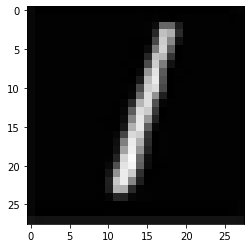

In [ ]:
digit,img1=test_on_img('/content/20200723_192026.jpg')
 
plt.imshow(img1)
print("Predicted Digit is {}",digit)